In [18]:
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pg_fitter_tools as fit
import cv2

In [2]:
%matplotlib notebook

In [3]:
nimages = 9
nfeatures = 40
image_feature_locations = np.zeros((nimages,nfeatures,2))

In [4]:
image_feature_locations = {}
for i in range(nimages):
    image_feature_locations[i] = {}
image_feature_locations[0][0] = [2100, 150]
image_feature_locations[0][1] = [2092, 319]
image_feature_locations[0][2] = [2079, 588]
image_feature_locations[0][4] = [2256, 156]
image_feature_locations[0][7] = [2182, 1436]
image_feature_locations[0][8] = [2134, 2302]
image_feature_locations[0][11] = [2516, 162]
image_feature_locations[0][12] = [2505, 329]
image_feature_locations[0][13] = [2485, 601]
image_feature_locations[0][14] = [2419, 1449]
image_feature_locations[0][15] = [2356, 2316]
image_feature_locations[0][18] = [2660, 334]
image_feature_locations[0][19] = [2636, 602]
image_feature_locations[1][0] = [1825, 1236]
image_feature_locations[1][1] = [1819, 1345]
image_feature_locations[1][2] = [1811, 1526]
image_feature_locations[1][4] = [1934, 1242]
image_feature_locations[1][5] = [1928, 1350]
image_feature_locations[1][6] = [1920, 1530]
image_feature_locations[1][7] = [1891, 2156]
image_feature_locations[1][8] = [1858, 2915]
image_feature_locations[1][11] = [2114, 1252]
image_feature_locations[1][12] = [2110, 1358]
image_feature_locations[1][13] = [2102, 1540]
image_feature_locations[1][14] = [2076, 2164]
image_feature_locations[1][15] = [2045, 2924]
image_feature_locations[1][18] = [2218, 1363]
image_feature_locations[1][19] = [2211, 1544]
image_feature_locations[1][21] = [3578, 1603]
image_feature_locations[1][22] = [3684, 1322]
image_feature_locations[1][23] = [3684, 1428]
image_feature_locations[1][24] = [3684, 1607]
image_feature_locations[1][25] = [3684, 2225]
image_feature_locations[1][26] = [3686, 2979]
image_feature_locations[1][29] = [3859, 1332]
image_feature_locations[1][30] = [3858, 1438]
image_feature_locations[1][31] = [3858, 1617]
image_feature_locations[1][32] = [3863, 2234]
image_feature_locations[1][33] = [3873, 2985]
image_feature_locations[1][36] = [3962, 1335]
image_feature_locations[1][37] = [3964, 1443]
image_feature_locations[1][38] = [3965, 1619]
image_feature_locations[2][0] = [1064, 1180]
image_feature_locations[2][1] = [1057, 1291]
image_feature_locations[2][2] = [1043, 1480]
image_feature_locations[2][4] = [1176, 1185]
image_feature_locations[2][5] = [1169, 1297]
image_feature_locations[2][6] = [1156, 1484]
image_feature_locations[2][7] = [1114, 2135]
image_feature_locations[2][8] = [1063, 2928]
image_feature_locations[2][11] = [1364, 1195]
image_feature_locations[2][12] = [1358, 1307]
image_feature_locations[2][13] = [1348, 1495]
image_feature_locations[2][14] = [1307, 2145]
image_feature_locations[2][15] = [1260, 2938]
image_feature_locations[2][18] = [1472, 1312]
image_feature_locations[2][19] = [1460, 1500]
image_feature_locations[2][20] = [2897, 1380]
image_feature_locations[2][21] = [2894, 1566]
image_feature_locations[2][22] = [3010, 1272]
image_feature_locations[2][23] = [3008, 1385]
image_feature_locations[2][24] = [3005, 1570]
image_feature_locations[2][25] = [2994, 2213]
image_feature_locations[2][26] = [2986, 2999]
image_feature_locations[2][29] = [3197, 1283]
image_feature_locations[2][30] = [3195, 1392]
image_feature_locations[2][31] = [3193, 1580]
image_feature_locations[2][32] = [3184, 2223]
image_feature_locations[2][36] = [3307, 1287]
image_feature_locations[2][37] = [3304, 1398]
image_feature_locations[2][38] = [3303, 1584]
image_feature_locations[3][0] = [1872, 944]
image_feature_locations[3][1] = [1868, 1034]
image_feature_locations[3][2] = [1862, 1188]
image_feature_locations[3][4] = [1964, 949]
image_feature_locations[3][5] = [1961, 1040]
image_feature_locations[3][6] = [1954, 1191]
image_feature_locations[3][7] = [1934, 1720]
image_feature_locations[3][8] = [1910, 2358]
image_feature_locations[3][11] = [2117, 957]
image_feature_locations[3][12] = [2114, 1048]
image_feature_locations[3][13] = [2109, 1199]
image_feature_locations[3][14] = [2091, 1726]
image_feature_locations[3][15] = [2071, 2363]
image_feature_locations[3][18] = [2206, 1053]
image_feature_locations[3][19] = [2200, 1204]
image_feature_locations[3][20] = [3329, 1110]
image_feature_locations[3][21] = [3330, 1257]
image_feature_locations[3][22] = [3416, 1025]
image_feature_locations[3][23] = [3416, 1113]
image_feature_locations[3][24] = [3417, 1262]
image_feature_locations[3][25] = [3419, 1769]
image_feature_locations[3][26] = [3424, 2387]
image_feature_locations[3][29] = [3559, 1033]
image_feature_locations[3][30] = [3560, 1122]
image_feature_locations[3][31] = [3561, 1268]
image_feature_locations[3][32] = [3563, 1775]
image_feature_locations[3][33] = [3572, 2388]
image_feature_locations[3][36] = [3647, 1039]
image_feature_locations[3][37] = [3644, 1126]
image_feature_locations[3][38] = [3646, 1272]
image_feature_locations[4][0] = [1783, 60]
image_feature_locations[4][1] = [1777, 145]
image_feature_locations[4][2] = [1769, 287]
image_feature_locations[4][3] = [1638, 2710]
image_feature_locations[4][4] = [1871, 71]
image_feature_locations[4][5] = [1866, 154]
image_feature_locations[4][6] = [1857, 297]
image_feature_locations[4][7] = [1829, 790]
image_feature_locations[4][8] = [1798, 1389]
image_feature_locations[4][9] = [1764, 2072]
image_feature_locations[4][10] = [1734, 2710]
image_feature_locations[4][11] = [2019, 86]
image_feature_locations[4][12] = [2014, 170]
image_feature_locations[4][13] = [2007, 313]
image_feature_locations[4][14] = [1981, 803]
image_feature_locations[4][15] = [1952, 1399]
image_feature_locations[4][16] = [1921, 2077]
image_feature_locations[4][17] = [1892, 2715]
image_feature_locations[4][18] = [2100, 179]
image_feature_locations[4][19] = [2094, 321]
image_feature_locations[4][20] = [3152, 298]
image_feature_locations[4][21] = [3151, 433]
image_feature_locations[4][23] = [3231, 308]
image_feature_locations[4][24] = [3230, 442]
image_feature_locations[4][25] = [3223, 906]
image_feature_locations[4][26] = [3218, 1474]
image_feature_locations[4][27] = [3212, 2117]
image_feature_locations[4][28] = [3206, 2717]
image_feature_locations[4][29] = [3364, 243]
image_feature_locations[4][30] = [3361, 321]
image_feature_locations[4][31] = [3361, 457]
image_feature_locations[4][32] = [3358, 917]
image_feature_locations[4][33] = [3354, 1481]
image_feature_locations[4][34] = [3352, 2121]
image_feature_locations[4][35] = [3349, 2720]
image_feature_locations[4][36] = [3440, 251]
image_feature_locations[4][37] = [3439, 332]
image_feature_locations[4][38] = [3439, 462]
image_feature_locations[4][39] = [3438, 2723]
image_feature_locations[5][3] = [317, 1561]
image_feature_locations[5][10] = [468, 1564]
image_feature_locations[5][17] = [713, 1570]
image_feature_locations[5][27] = [2731, 736]
image_feature_locations[5][28] = [2660, 1605]
image_feature_locations[5][34] = [2939, 749]
image_feature_locations[5][35] = [2857, 1607]
image_feature_locations[5][39] = [2975, 1610]
image_feature_locations[6][3] = [1029, 1322]
image_feature_locations[6][9] = [1137, 406]
image_feature_locations[6][10] = [1159, 1327]
image_feature_locations[6][16] = [1369, 417]
image_feature_locations[6][17] = [1374, 1337]
image_feature_locations[6][27] = [3391, 497]
image_feature_locations[6][28] = [3257, 1398]
image_feature_locations[6][34] = [3616, 506]
image_feature_locations[6][35] = [3468, 1407]
image_feature_locations[6][39] = [3600, 1413]
image_feature_locations[7][0] = [1895, 756]
image_feature_locations[7][1] = [1887, 953]
image_feature_locations[7][2] = [1873, 1277]
image_feature_locations[7][4] = [2090, 764]
image_feature_locations[7][5] = [2081, 960]
image_feature_locations[7][6] = [2065, 1284]
image_feature_locations[7][7] = [2018, 2348]
image_feature_locations[7][11] = [2412, 777]
image_feature_locations[7][12] = [2402, 974]
image_feature_locations[7][13] = [2387, 1299]
image_feature_locations[7][14] = [2330, 2361]
image_feature_locations[7][18] = [2596, 982]
image_feature_locations[7][19] = [2576, 1307]
image_feature_locations[8][3] = [1082, 1821]
image_feature_locations[8][8] = [1209, 509]
image_feature_locations[8][9] = [1190, 1206]
image_feature_locations[8][10] = [1175, 1825]
image_feature_locations[8][15] = [1365, 513]
image_feature_locations[8][16] = [1345, 1211]
image_feature_locations[8][17] = [1328, 1833]
image_feature_locations[8][26] = [2767, 551]
image_feature_locations[8][27] = [2733, 1258]
image_feature_locations[8][28] = [2700, 1885]
image_feature_locations[8][33] = [2928, 553]
image_feature_locations[8][34] = [2894, 1263]
image_feature_locations[8][35] = [2858, 1891]
image_feature_locations[8][39] = [2956, 1896]

In [5]:
true_feature_locations = {
    0: [0, 4419.6, 0],
    1: [0, 4267.2, 0],
    2: [0, 4013.2, 0],
    3: [0, 0, 0],
    4: [152.4, 4419.6, 0],
    5: [152.4, 4267.2, 0],
    6: [152.4, 4013.2, 0],
    7: [152.4, 3149.6, 0],
    8: [152.4, 2133.6, 0],
    9: [152.4, 1016, 0],
    10: [152.4, 0, 0],
    11: [406.4, 4419.6, 0],
    12: [406.4, 4267.2, 0],
    13: [406.4, 4013.2, 0],
    14: [406.4, 3149.6, 0],
    15: [406.4, 2133.6, 0],
    16: [406.4, 1016, 0],
    17: [406.4, 0, 0],
    18: [558.8, 4267.2, 0],
    19: [558.8, 4013.2, 0],
    20: [2489.2, 4267.2, 0],
    21: [2489.2, 4013.2, 0],
    22: [2641.6, 4419.6, 0],
    23: [2641.6, 4267.2, 0],
    24: [2641.6, 4013.2, 0],
    25: [2641.6, 3149.6, 0],
    26: [2641.6, 2133.6, 0],
    27: [2641.6, 1016, 0],
    28: [2641.6, 0, 0],
    29: [2895.6, 4419.6, 0],
    30: [2895.6, 4267.2, 0],
    31: [2895.6, 4013.2, 0],
    32: [2895.6, 3149.6, 0],
    33: [2895.6, 2133.6, 0],
    34: [2895.6, 1016, 0],
    35: [2895.6, 0, 0],
    36: [3048, 4419.6, 0],
    37: [3048, 4267.2, 0],
    38: [3048, 4013.2, 0],
    39: [3048, 0, 0]}

In [6]:
focal_length = [2.760529621789217e+03, 2.767014510543478e+03]
principle_point = [1.914303537872458e+03, 1.596386868474348e+03]
seed_feature_locations = {i: np.random.normal(f, 20) for i, f in true_feature_locations.items()}
fitter = fit.PhotogrammetryFitter(image_feature_locations, seed_feature_locations, focal_length, principle_point)

In [19]:
camera_rotations, camera_translations, reprojected_points = fitter.estimate_camera_poses(flags=cv2.SOLVEPNP_EPNP)

image 0 reprojection errors:    average: 26.76659128044236    max: 39.43314917067798
image 1 reprojection errors:    average: 27.603617548907362    max: 51.85372881376713
image 2 reprojection errors:    average: 47.87213226909854    max: 173.2131899593918
image 3 reprojection errors:    average: 17.322334431191955    max: 39.313274132215284
image 4 reprojection errors:    average: 16.015608923184146    max: 40.401452073758406
image 5 reprojection errors:    average: 67.02875998721294    max: 128.26012441678094
image 6 reprojection errors:    average: 17.764233607295377    max: 31.99559952359712
image 7 reprojection errors:    average: 34.5372180615485    max: 73.23924625661259
image 8 reprojection errors:    average: 64.12703515417488    max: 108.4149302978201


In [20]:
camera_rotations, camera_translations, reco_locations = fitter.bundle_adjustment(camera_rotations, camera_translations)

`ftol` termination condition is satisfied.
Function evaluations 1935, initial cost 1.4883e+05, final cost 8.5543e+01, first-order optimality 1.00e-02.
mean reprojection error: 0.8243544052063382
max reprojection error: 2.9817143456275472


In [23]:
errors, reco_transformed, scale, R, translation, location_mean = fit.kabsch_errors(
    true_feature_locations, reco_locations)
print("mean reconstruction error:", linalg.norm(errors, axis=1).mean())
print("max reconstruction error:", linalg.norm(errors, axis=1).max())

mean reconstruction error: 9.891282672491865
max reconstruction error: 27.432415885637518


In [24]:
camera_orientations, camera_positions = fit.camera_world_poses(camera_rotations, camera_translations)
camera_orientations = np.matmul(R, camera_orientations)
camera_positions = camera_positions - translation
camera_positions = scale*R.dot(camera_positions.transpose()).transpose() + location_mean

<IPython.core.display.Javascript object>


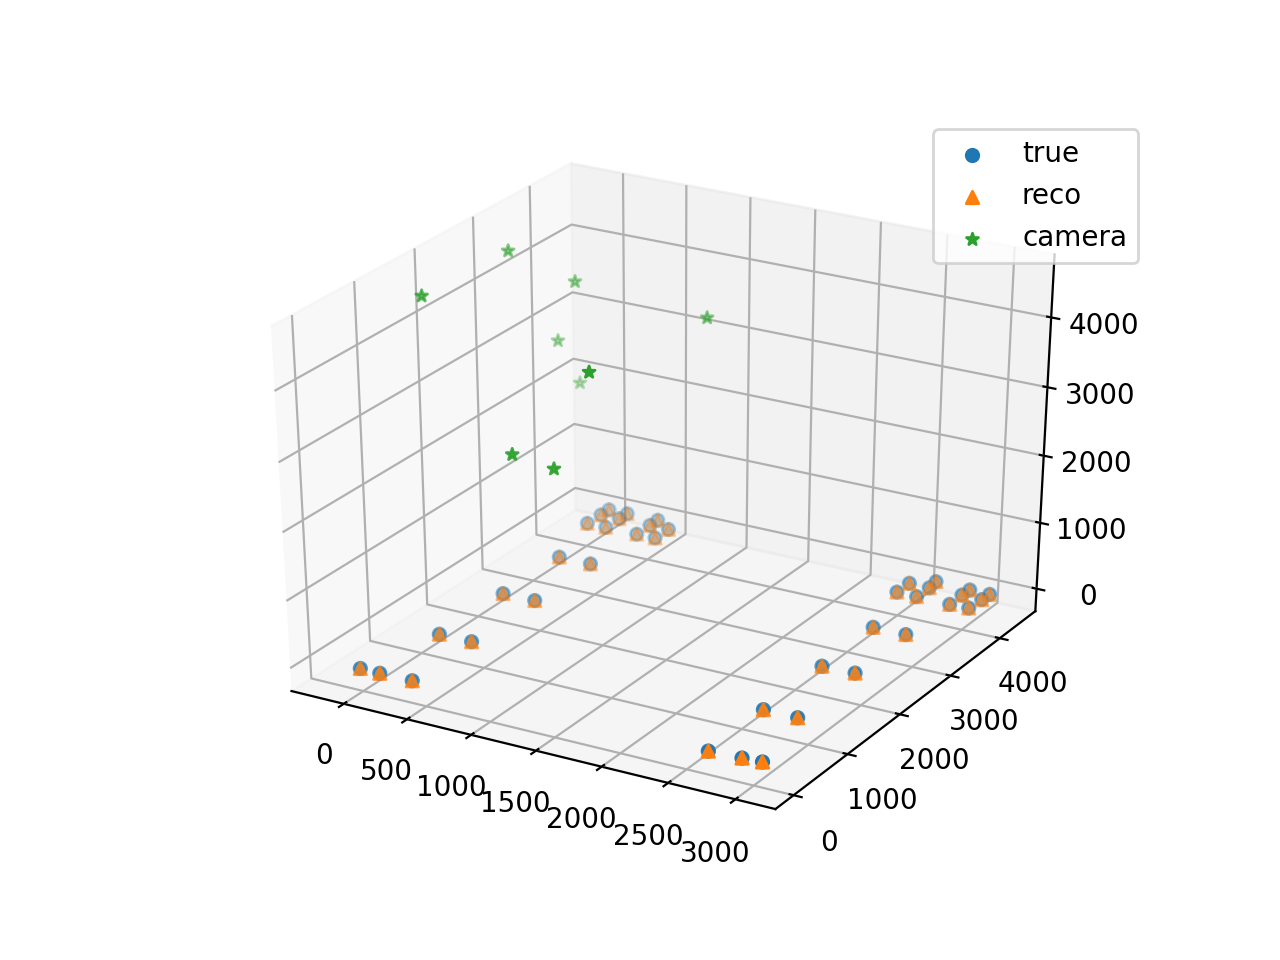

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(true_translated[:,0], true_translated[:,1], true_translated[:,2], marker='o', label="true")
ax.scatter(reco_transformed[:,0], reco_transformed[:,1], reco_transformed[:,2], marker='^', label="reco")
ax.scatter(camera_positions[:,0], camera_positions[:,1], camera_positions[:,2], marker='*', label="camera")
plt.legend(loc=0)

<IPython.core.display.Javascript object>


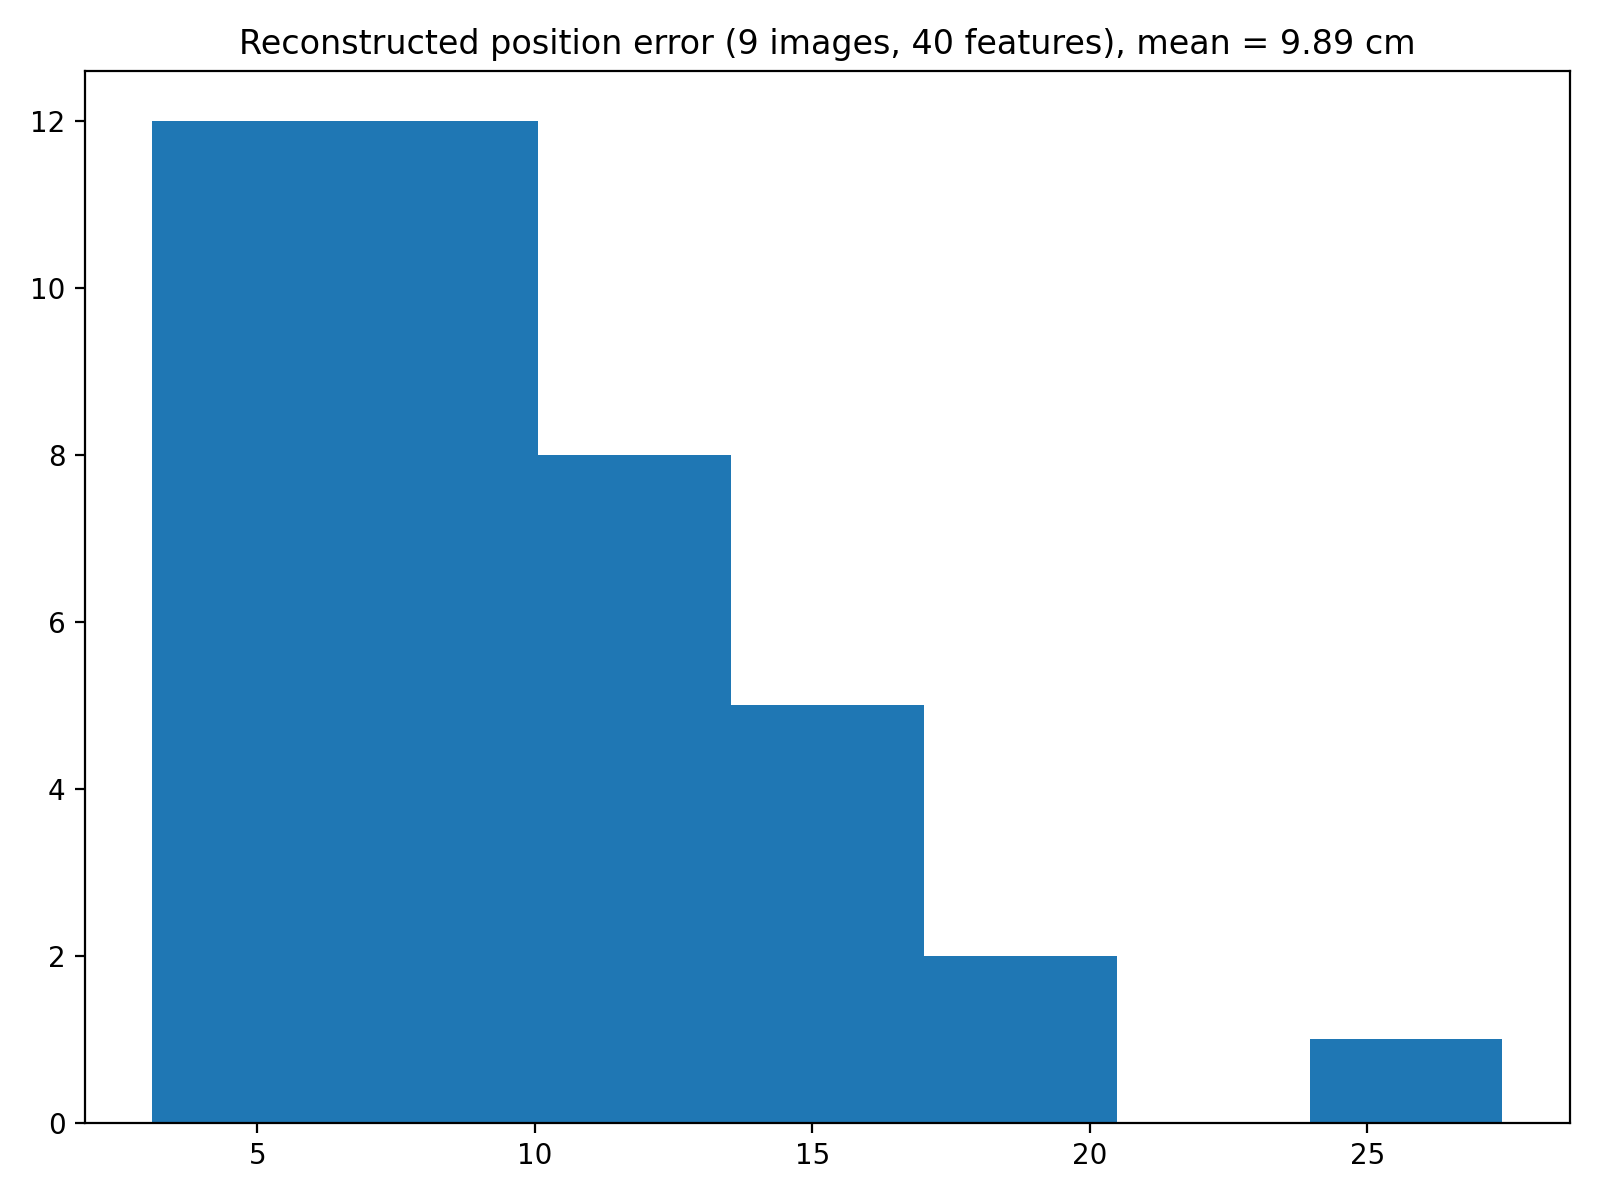

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(linalg.norm(errors, axis=1), bins='auto')
ax.set_title("Reconstructed position error ({} images, {} features), mean = {:.2f} cm".format(
    nimages, nfeatures, linalg.norm(errors, axis=1).mean()))
fig.tight_layout()

<IPython.core.display.Javascript object>


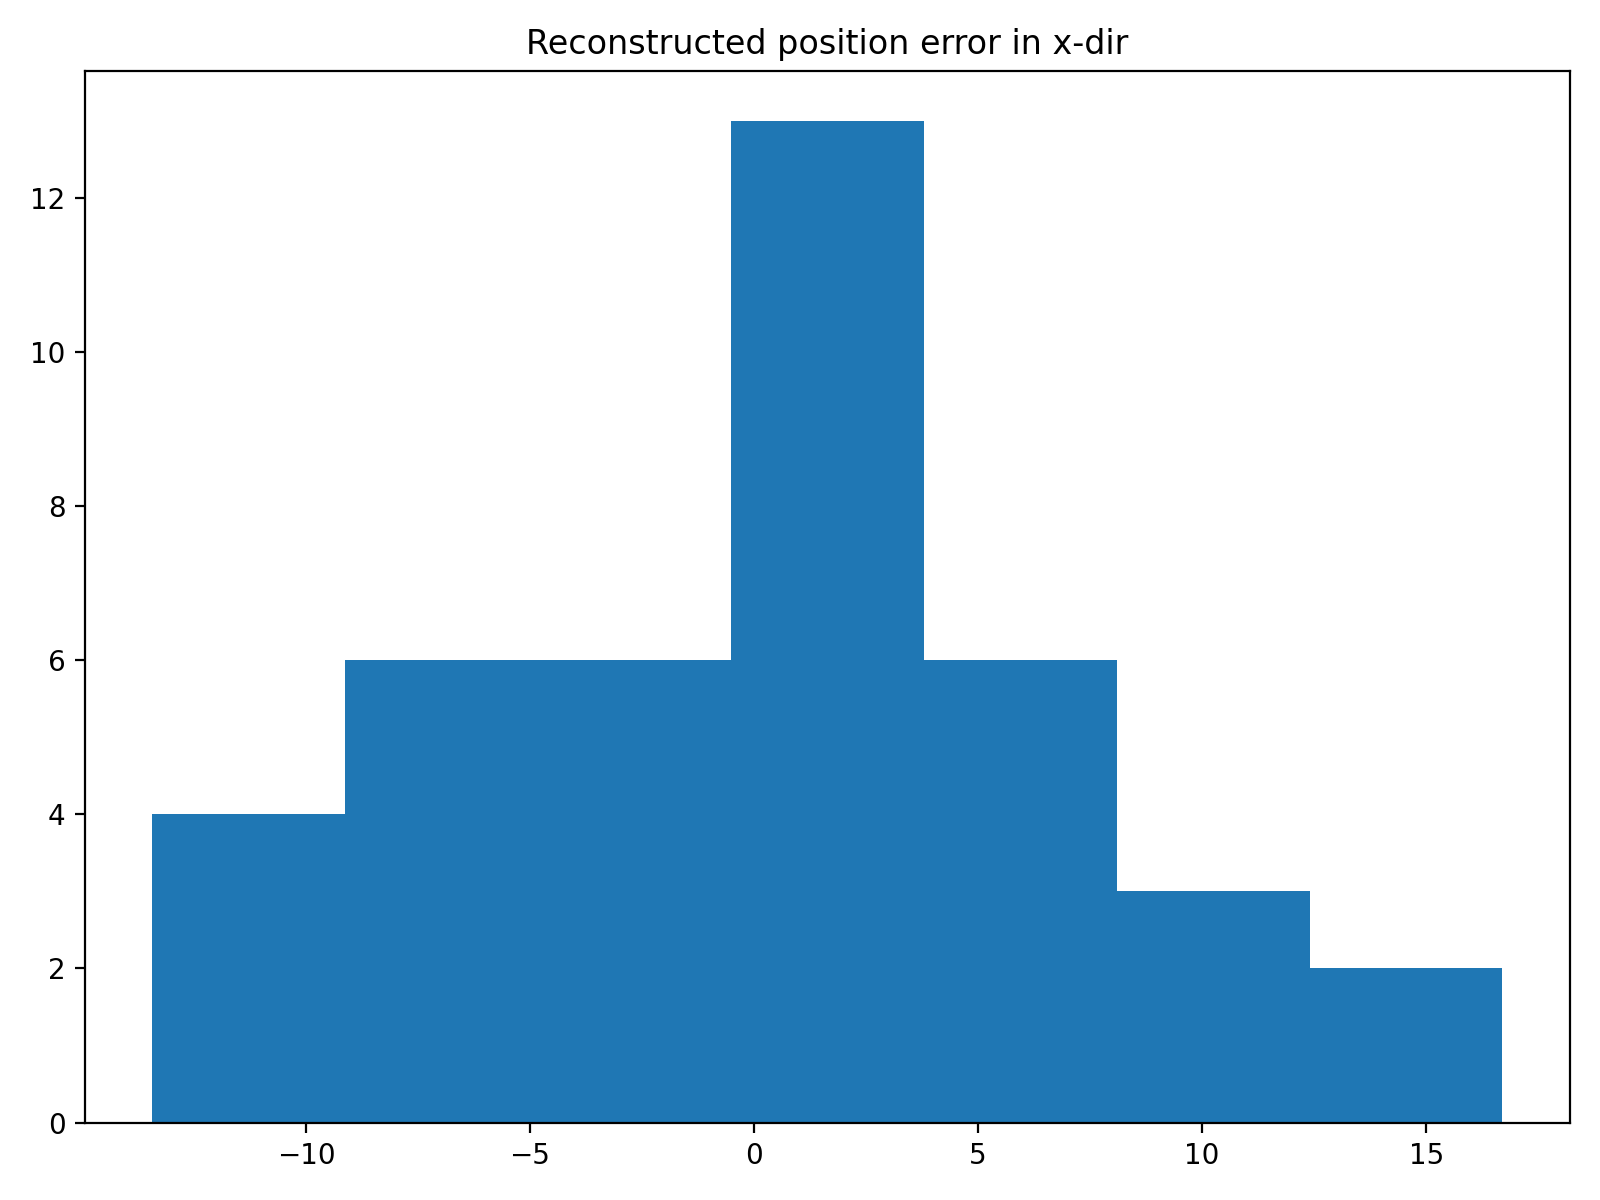

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(errors[:,0], bins='auto')
ax.set_title("Reconstructed position error in x-dir")
fig.tight_layout()

<IPython.core.display.Javascript object>


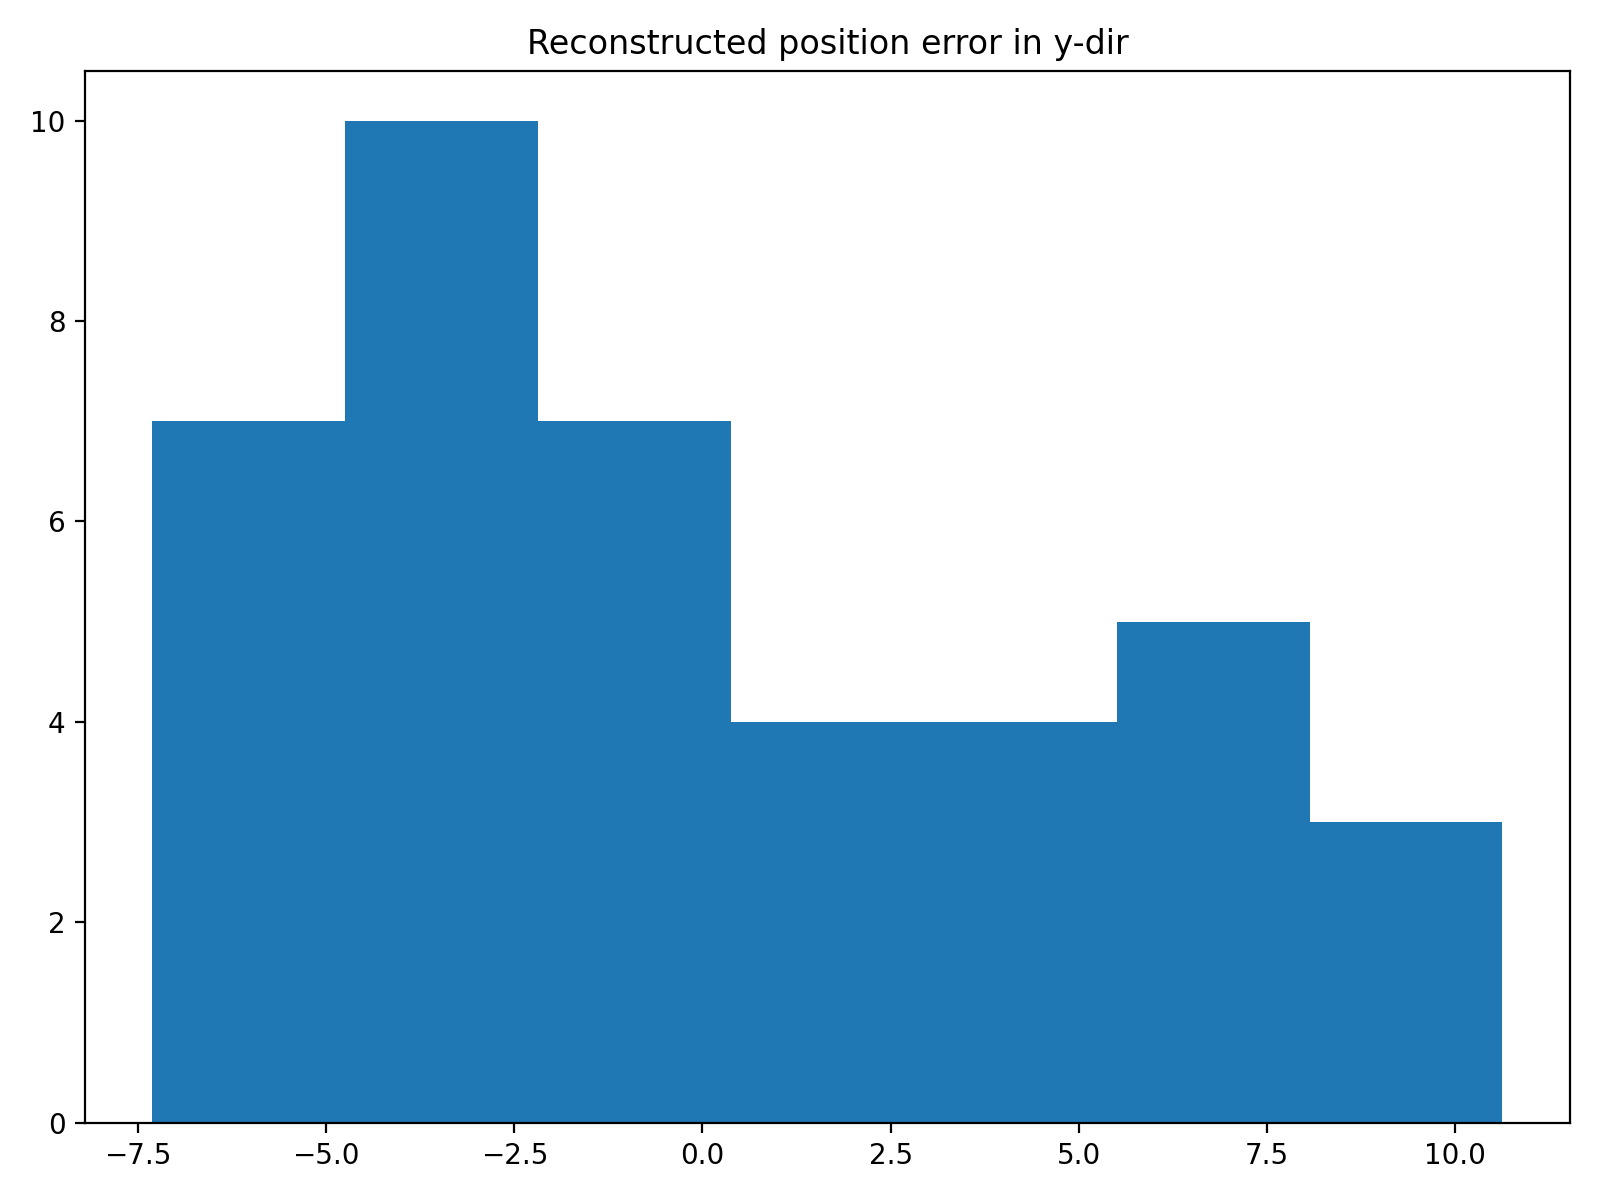

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(errors[:,1], bins='auto')
ax.set_title("Reconstructed position error in y-dir")
fig.tight_layout()

<IPython.core.display.Javascript object>


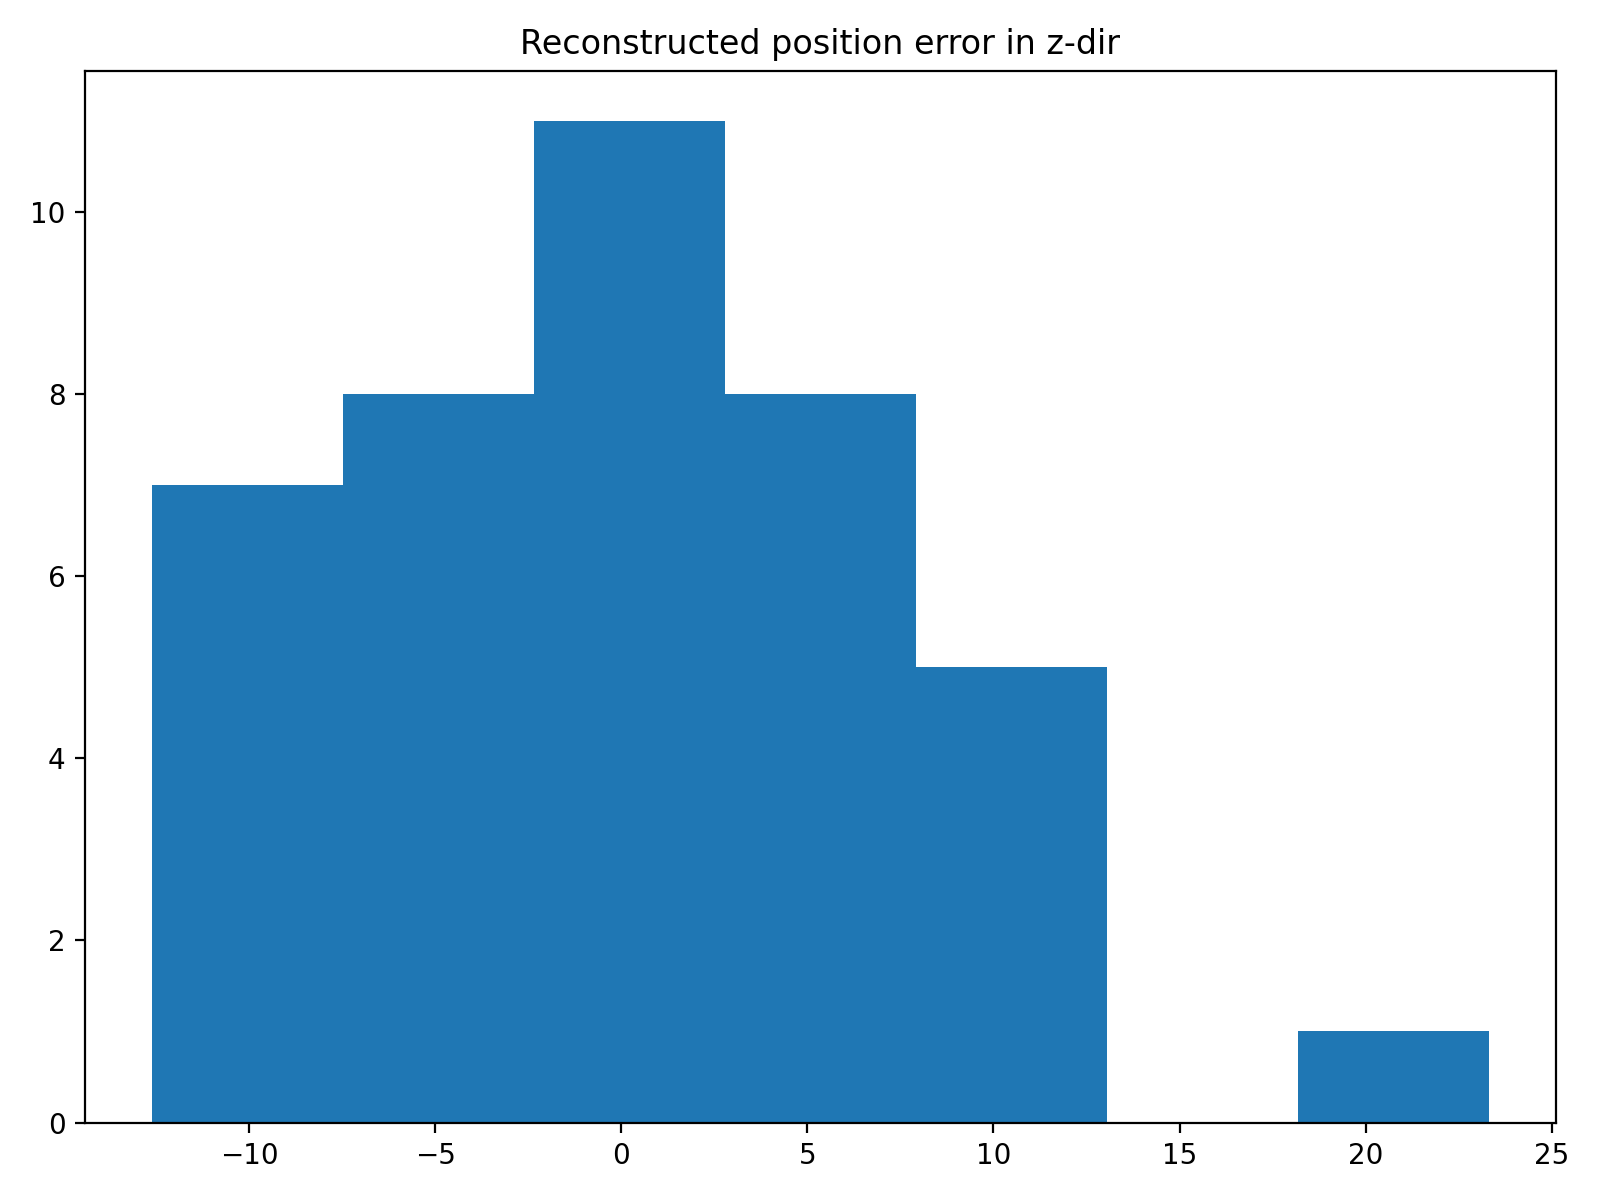

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(errors[:,2], bins='auto')
ax.set_title("Reconstructed position error in z-dir")
fig.tight_layout()